<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Bird Species Classification Using Convolutional Neural Networks </centre></strong></h1>
<img src="../images/logo_part1.jpg">

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Model Architecture </centre></strong></h2>

#### 03.Model Development
##### Convolutional Neural Networks (CNN) for Bird Species Classification
**Objective:** Train a custom CNN model on the preprocessed dataset.

---

#### Import Libraries and Load Data:

In [8]:
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from tensorflow.keras.models import Sequential
import visualkeras

from CNN.scritps.data_preprocessing import preprocess_and_save_images

data_dir = '../dataset/raw/CUB_200_2011/images/'
train_generator, validation_generator = preprocess_and_save_images(data_dir, '../dataset/processed/images')

ImportError: cannot import name 'preprocess_and_save_images' from 'CNN.scritps.data_preprocessing' (D:\ISEP-repos\mei_aprof\CNN\scritps\data_preprocessing.py)

#### Define Model Architecture:

In [5]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,408,921 (169.41 MB)

 Trainable params: 44,408,921 (169.41 MB)

 Non-trainable params: 0 (0.00 B)

#### Train Model:

In [6]:
history_1 = model_1.fit(train_generator, epochs=20, validation_data=validation_generator)
model_1.save('models/custom_cnn/bird_species_model_1.h5')

Epoch 1/20


C:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 34s 850ms/step - accuracy: 0.0463 - loss: 4.3830 - val_accuracy: 0.0379 - val_loss: 3.2033
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 945ms/step - accuracy: 0.0735 - loss: 3.1737 - val_accuracy: 0.1207 - val_loss: 3.0453
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 887ms/step - accuracy: 0.2037 - loss: 2.8037 - val_accuracy: 0.2034 - val_loss: 2.7471
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 860ms/step - accuracy: 0.4622 - loss: 1.9221 - val_accuracy: 0.2276 - val_loss: 2.8834
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 856ms/step - accuracy: 0.6784 - loss: 1.1168 - val_accuracy: 0.2586 - val_loss: 3.0643
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 868ms/step - accuracy: 0.8410 - loss: 0.5591 - val_accuracy: 0.3138 - val_loss: 3.9408
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 877ms/step - accuracy: 0.9146 - loss: 0.3249 - val_accuracy: 0.3000 - val_loss: 4.0882
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 843ms/step - accuracy: 0.9472 - loss: 0.2343 - val_accuracy: 0.272

#### Plot Training History:

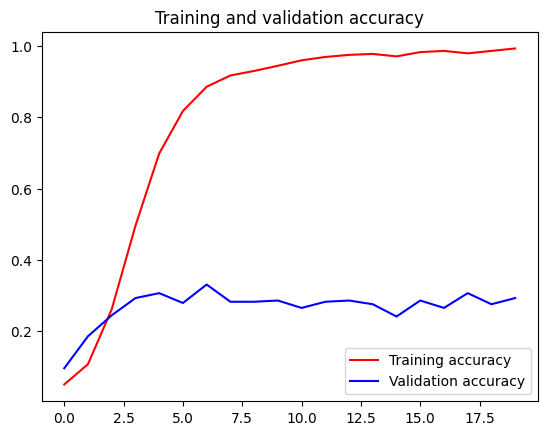

<Figure size 640x480 with 0 Axes>

In [12]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()
